In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv("../data/Cleaned_house_data.csv")

In [7]:
# Separating dataset in X and y for model formation.
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]
y = df['price']

In [8]:
# Spliting dataset in training and testing dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Selecting model and training.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Model Evaluation
y_pred = model.predict(X_test)

In [11]:
# Mean square and r square for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean square error = ", mse)
print("R-square = ", r2)
print("RMSE = ", rmse)

Mean square error =  51176621738.91661
R-square =  0.661478140548757
RMSE =  226222.5049346696


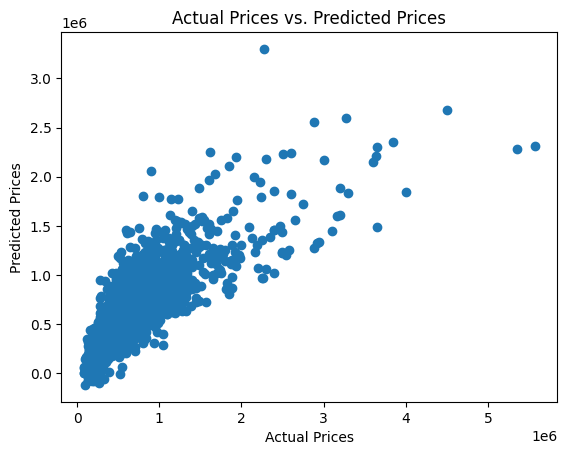

In [12]:
# Visualization of prediction.
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

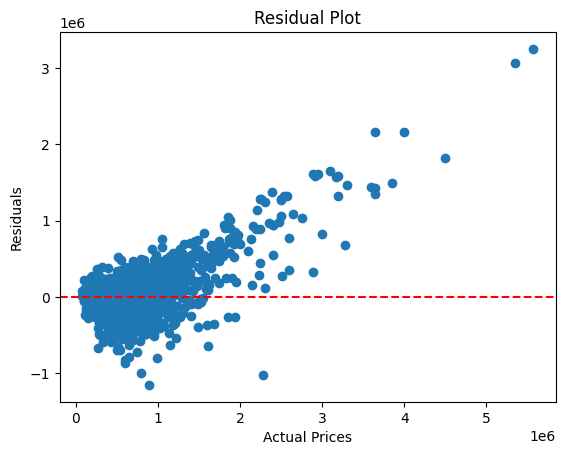

In [13]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [17]:
# Predicting price of a house with given data.
new_data = [[3,2,1800,1.0,0,2,7,1200,600,47.5112,1700]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price)

Predicted Price: [539142.6256055]


c:\Users\Deeksha\anaconda3\envs\torch_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


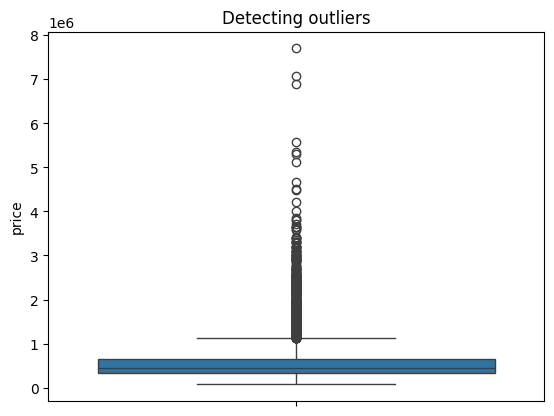

In [18]:
# See if any outliers are there.
sns.boxplot(y)
plt.title("Detecting outliers")
plt.show()

Here, can see R^2 score is 0.66 that is approx 66% which is an average score and Mean square, Root mean square error are very high. It shows that we still need to work on it to improve r square score and reduce errors. Highly skewed.

So, to solve all these issues we are applying log transformation to the target variable. 

In [19]:
# Applying log transformation to target variable to reduce skewness.
df['log_price'] = np.log1p(df['price'])
y1 = df['log_price']

In [20]:
df.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309987
1,1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195616
2,2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100718
3,3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311331
4,4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142168


In [21]:
# Again, diving dataset into features and label.
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]
y = df['log_price']

In [22]:
# Training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [24]:
y_predi = model2.predict(X_test)
y_predi

array([12.91555858, 13.45495152, 14.0670745 , ..., 12.93132044,
       13.32409173, 13.43299621])

In [25]:
# Score/Accuracy
model2.score(X_test, y_test)

0.7269733361193725

In [28]:
# The output is coming after log transformation needs to be applied anti logarithm.
actual_price = np.expm1(12.91555858)
print("$", actual_price)

$ 406588.18451213045


In [32]:
# Mean square and r square for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predi)
r2 = r2_score(y_test, y_predi)
rmse = np.sqrt(mse)
print("Mean square error = ", mse)
print("R-square = ", r2)
print("RMSE = ", rmse)
print("Accuracy = ",r2*100,"%")

Mean square error =  0.07709335102168303
R-square =  0.7269733361193725
RMSE =  0.2776568944249054
Accuracy =  72.69733361193725 %


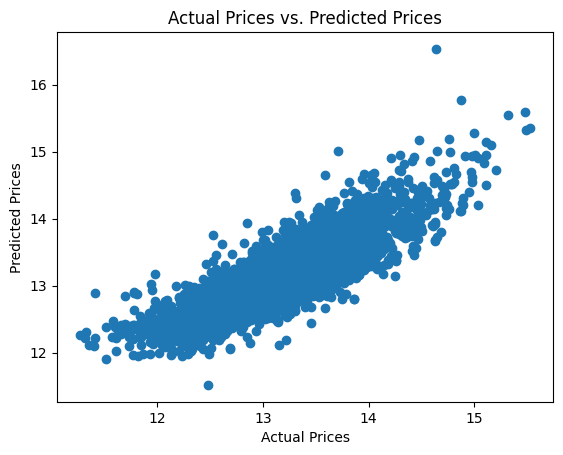

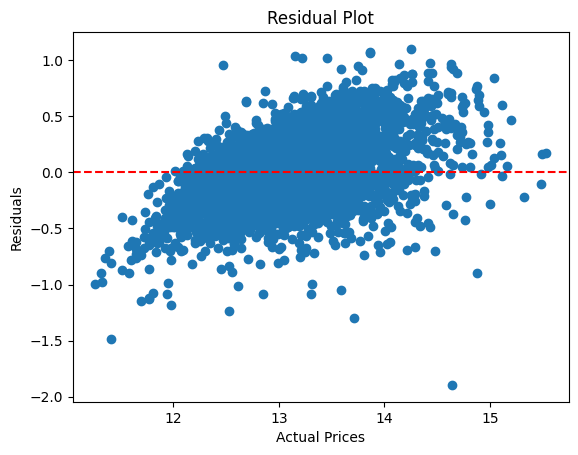

c:\Users\Deeksha\anaconda3\envs\torch_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
#  the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_predi)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# We can also create a residual plot to check the model's performance
residuals = y_test - y_predi
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[3,2,1800,1.0,0,2,7,1200,600,47.5112,1700]]
predicted_price = model2.predict(new_data)

In [35]:
import joblib
joblib.dump(model2, "linear_regression.pkl")

['linear_regression.pkl']